$ 3 x_1 + 2 x_2 = 2$

$ 2 x_1 + 6 x_2 = -8$

In [18]:
A = np.array([[3, 2],
              [2, 6]])

b = np.array([2, -8])

In [42]:
x1 = 14/7
x2 = -(3*14/7 - 2)/2
print(x1, x2)
x_exact = np.array([x1, x2])

2.0 -2.0


In [43]:
A.dot(x_exact)

array([ 2., -8.])

In [36]:
def quad_form(x, A, b, c):
    """
    Quadratic Form
    """
    return x.dot(A.dot(x)) - b.dot(x) + c
    
    

In [37]:
quad_form(x, A, b, 0)

0.0

In [38]:
def deriv_quad_form(x, A, b):
    0.5*A.dot(x) + 0.5*A.T.dot(x) - b

In [39]:
def deriv_pos_def(x, A, b):
    return b - A.dot(x)

In [93]:
def sd_step(x, A, b):
    r = deriv_pos_def(x, A, b)
    alpha = r.dot(r) / r.dot(A.dot(r))
    return x + r*alpha

d = b - A.dot(x)
def cg_step(d, x, A, b):
    

In [94]:
import matplotlib.pyplot as plt

[ 0.08       -0.61333333]
[ 1.00444444 -2.        ]
[ 1.52213333 -1.65487407]
[ 1.75221728 -2.        ]
[ 1.8810643  -1.91410199]
[ 1.93832964 -2.        ]
[ 1.97039822 -1.97862094]
[ 1.98465093 -2.        ]
[ 1.99263245 -1.99467899]
[ 1.99617979 -2.        ]
[ 1.9981663  -1.99867566]
[ 1.99904919 -2.        ]
[ 1.99954361 -1.99967039]
[ 1.99976335 -2.        ]
[ 1.99988641 -1.99991796]
[ 1.9999411 -2.       ]
[ 1.99997173 -1.99997958]
[ 1.99998534 -2.        ]
[ 1.99999296 -1.99999492]
[ 1.99999635 -2.        ]
[ 1.99999825 -1.99999874]
[ 1.99999909 -2.        ]
[ 1.99999956 -1.99999969]
[ 1.99999977 -2.        ]
[ 1.99999989 -1.99999992]
[ 1.99999994 -2.        ]
[ 1.99999997 -1.99999998]
[ 1.99999999 -2.        ]
[ 1.99999999 -2.        ]
[ 2. -2.]
[ 2. -2.]


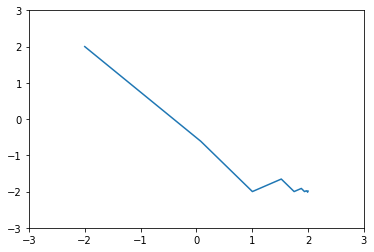

In [101]:
x0 = np.array([-2, 2])
xprev = np.array([0, 0])
xs = [x0]
while np.linalg.norm(A.dot(x) - b) > 1e-8:
    xprev = x
    x = sd_step(xprev, A, b)
    xs.append(x)
    print(x)

plt.xlim(-3, 3)
plt.ylim(-3, 3)
xs = np.array(xs)
plt.plot(xs[:, 0], xs[:, 1])


In [114]:
x = x0.copy()
d = r = b - A.dot(x)
xs = []

def cg_step(x, r, d, A, b):
    alpha = r.dot(r)/d.dot(A.dot(d))
    print(alpha)
    x = x + alpha*d
    rold = r.copy()
    r = rold - alpha * A.dot(d)
    beta = r.dot(r) / rold.dot(rold)
    d = (r + beta*d)
    return x, r, d

xs = [x]
print(x)
while np.linalg.norm(A.dot(x) - b) > 1e-8:
    x, r, d = cg_step(x, r, d, A, b)
    xs.append(x)
    print(x)

[-2  2]
0.204819277108
[-1.18072289 -1.27710843]
0.348739495798
[ 2. -2.]
